📁 Please upload your HTRU_2.csv file...


Saving HTRU_2.csv to HTRU_2.csv
📊 DATASET OVERVIEW
Dataset Shape: (17898, 9)

First 5 rows:
      Mean_IP     Std_IP  ExcessKurt_IP  Skewness_IP  Mean_SNR    Std_SNR  \
0  140.562500  55.683782      -0.234571    -0.699648  3.199833  19.110426   
1  102.507812  58.882430       0.465318    -0.515088  1.677258  14.860146   
2  103.015625  39.341649       0.323328     1.051164  3.121237  21.744669   
3  136.750000  57.178449      -0.068415    -0.636238  3.642977  20.959280   
4   88.726562  40.672225       0.600866     1.123492  1.178930  11.468720   

   ExcessKurt_SNR  Skewness_SNR  class  
0        7.975532     74.242225      0  
1       10.576487    127.393580      0  
2        7.735822     63.171909      0  
3        6.896499     53.593661      0  
4       14.269573    252.567306      0  

🎯 Class Distribution:
class
0    16259
1     1639
Name: count, dtype: int64

Class Balance:
class
0    90.842552
1     9.157448
Name: proportion, dtype: float64

✂️ TRAIN-TEST SPLIT
Training set: (1

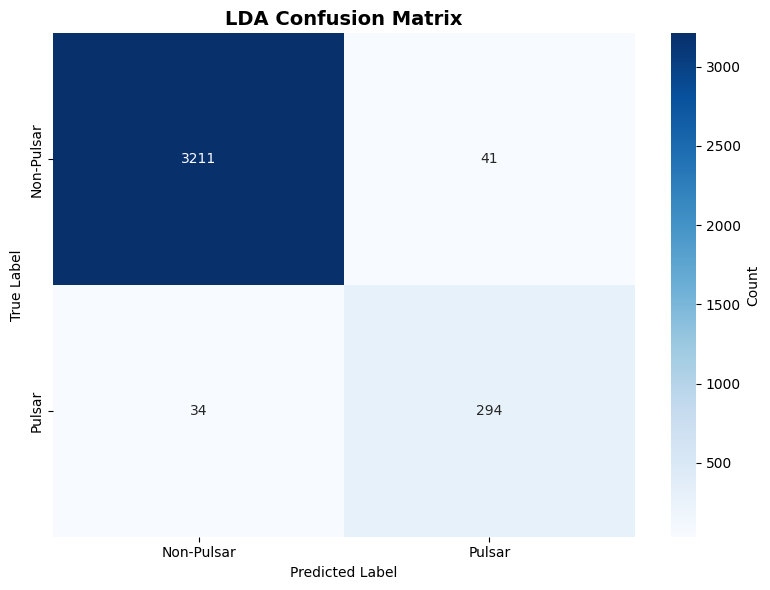


🌲 MODEL 2: RANDOM FOREST CLASSIFIER

🔄 Performing 5-Fold Cross-Validation...

📊 Cross-Validation Results (5 folds):
  Accuracy:  0.9794 (+/- 0.0025)
  Recall:    0.9754 (+/- 0.0034)
  Precision: 0.9833 (+/- 0.0023)
  F1-Score:  0.9793 (+/- 0.0025)

🔄 Training Random Forest on full training set...

📈 Random Forest Classification Report (Threshold = 0.5):
              precision    recall  f1-score   support

  Non-Pulsar       0.99      0.98      0.99      3252
      Pulsar       0.84      0.90      0.87       328

    accuracy                           0.98      3580
   macro avg       0.92      0.94      0.93      3580
weighted avg       0.98      0.98      0.98      3580



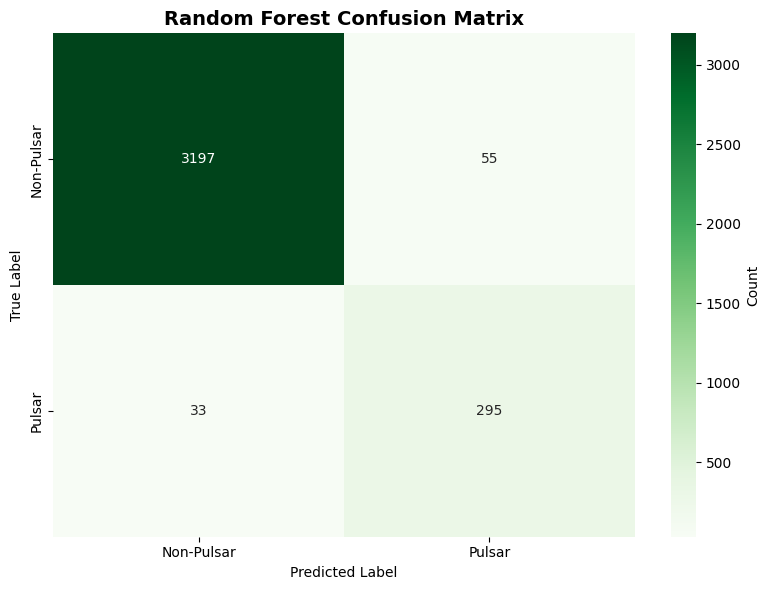


🎯 FEATURE IMPORTANCE
          Feature  Importance
2   ExcessKurt_IP    0.527722
0         Mean_IP    0.188210
3     Skewness_IP    0.136045
5         Std_SNR    0.065921
4        Mean_SNR    0.025683
6  ExcessKurt_SNR    0.019264
1          Std_IP    0.018848
7    Skewness_SNR    0.018307


/tmp/ipython-input-79653107.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


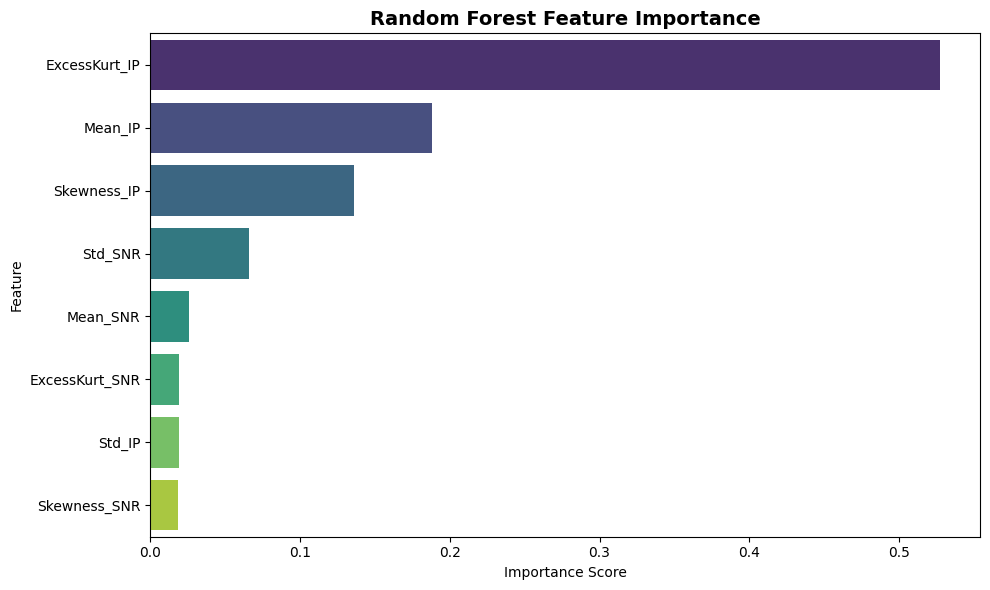


🎯 THRESHOLD OPTIMIZATION

📊 Performance at Different Thresholds:
 Threshold  Accuracy  Precision   Recall  F1-Score
      0.10  0.881006   0.430791 0.929878  0.588803
      0.15  0.933240   0.586074 0.923780  0.717160
      0.20  0.950279   0.664474 0.923780  0.772959
      0.25  0.959218   0.715640 0.920732  0.805333
      0.30  0.966201   0.760705 0.920732  0.833103
      0.35  0.968436   0.782152 0.908537  0.840621
      0.40  0.970950   0.804348 0.902439  0.850575
      0.45  0.974022   0.830986 0.899390  0.863836
      0.50  0.975419   0.842857 0.899390  0.870206
      0.55  0.975698   0.853372 0.887195  0.869955
      0.60  0.976816   0.865672 0.884146  0.874811
      0.65  0.979050   0.886850 0.884146  0.885496
      0.70  0.979888   0.897516 0.881098  0.889231
      0.75  0.979609   0.902208 0.871951  0.886822
      0.80  0.980447   0.916129 0.865854  0.890282
      0.85  0.980168   0.926910 0.850610  0.887122

✨ Optimal Threshold (Max Recall): 0.10
   Accuracy:  0.8810
   Pre

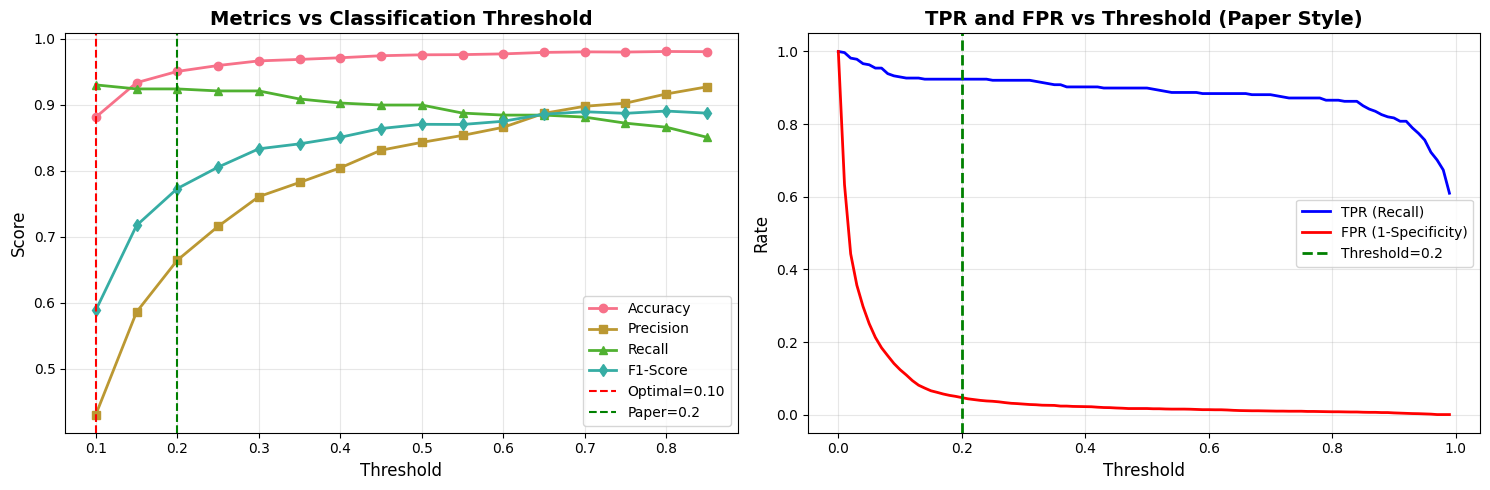


📊 ROC CURVE ANALYSIS


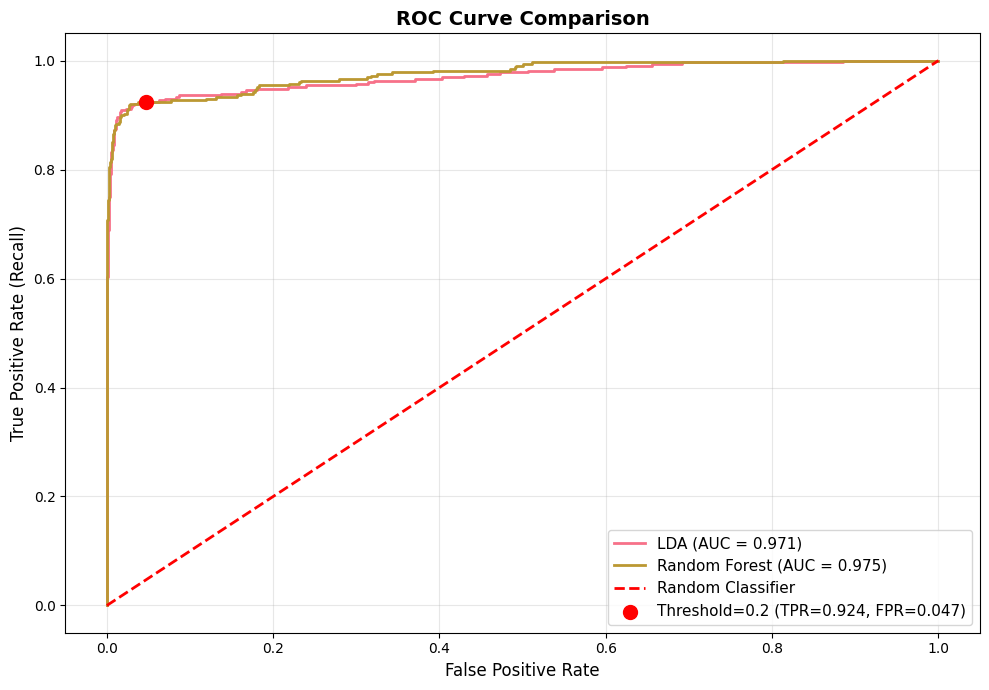


🎯 AUC Scores:
  LDA: 0.9708
  Random Forest: 0.9755

📊 PRECISION-RECALL CURVE ANALYSIS


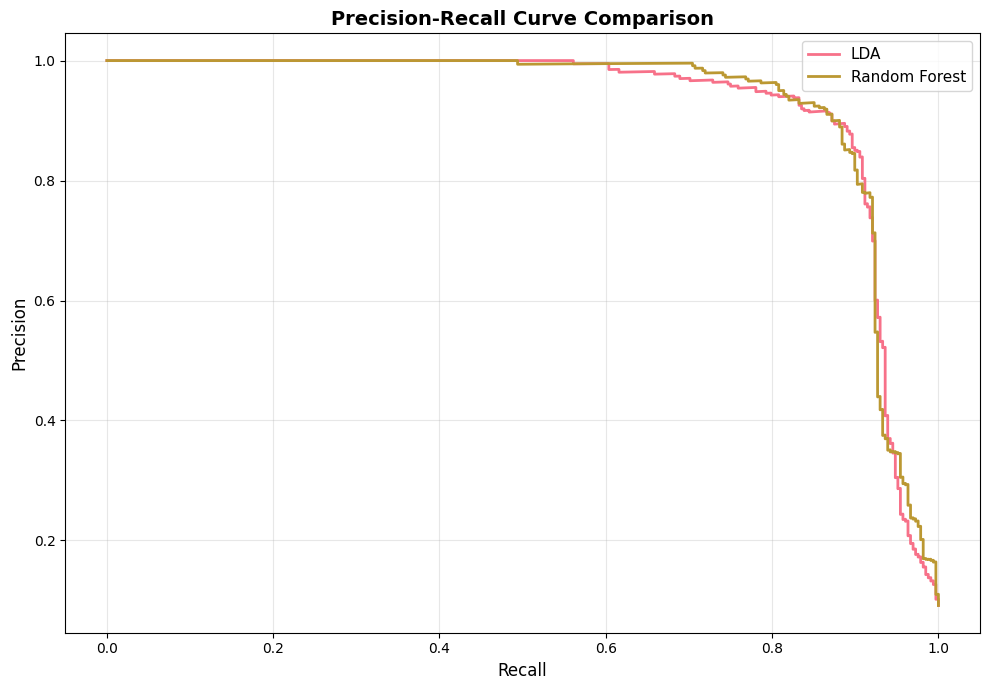


🏆 MODEL COMPARISON SUMMARY
              Model  Threshold  Accuracy  Precision   Recall  F1-Score      AUC
          LDA (0.5)        0.5  0.979050   0.877612 0.896341  0.886878 0.970761
Random Forest (0.5)        0.5  0.975419   0.842857 0.899390  0.870206 0.975471
Random Forest (0.2)        0.2  0.950279   0.664474 0.923780  0.772959 0.975471


/tmp/ipython-input-79653107.py:395: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


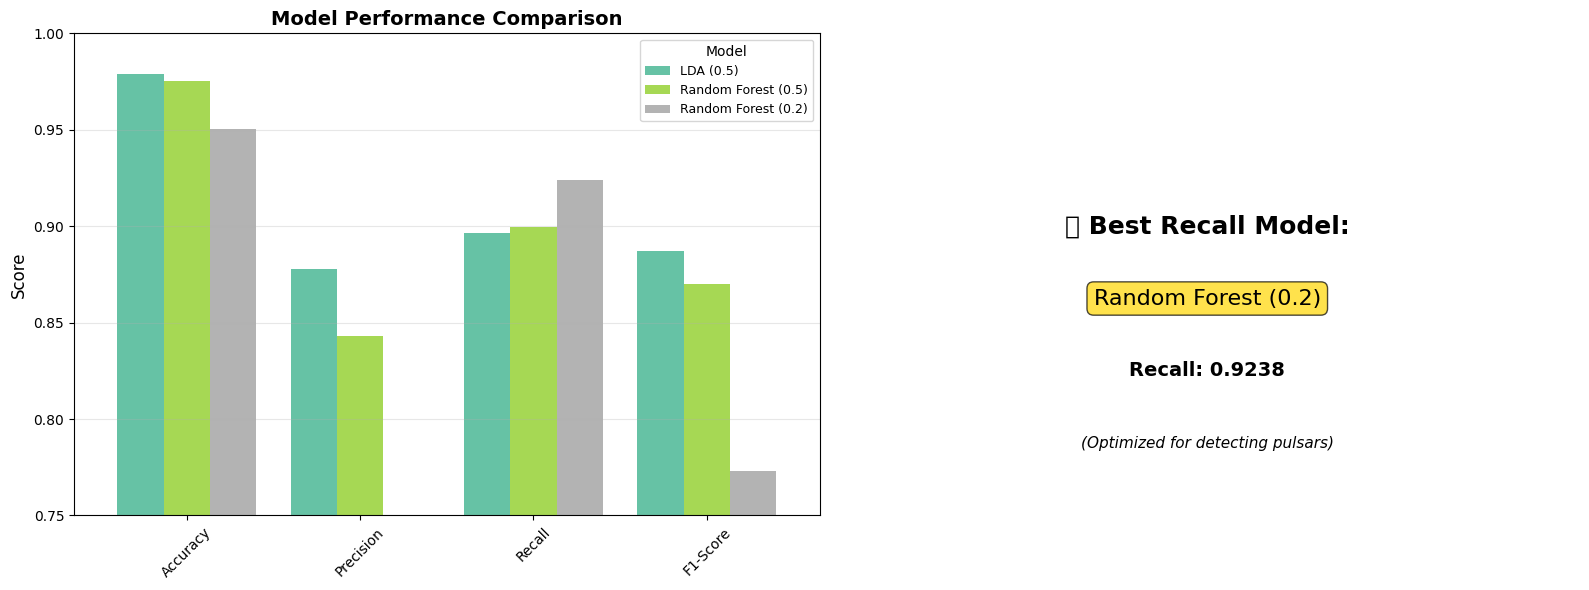


✅ Analysis Complete!
📌 Key Findings:
   • Cross-validation ensures robust model performance
   • Threshold optimization improves recall from 0.8994 to 0.9238
   • Using threshold=0.2 maximizes pulsar detection (as per paper)
   • Best model: Random Forest (0.2) with 92.38% recall

💾 To save the optimized model:
  import pickle
  with open('rf_model_optimized.pkl', 'wb') as f:
      pickle.dump(rf, f)
  # Save threshold setting
  optimal_config = {'threshold': 0.2, 'model': 'RandomForest'}


In [2]:
# ===========================================
# 🚀 Pulsar Candidate Classification Project
# Dataset: HTRU_2.csv (UCI ML Repository)
# Google Colab Ready Version
# ===========================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, auc,
                             precision_recall_curve, accuracy_score, precision_score,
                             recall_score, f1_score)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

# Configure matplotlib for better display in Colab
%matplotlib inline
plt.style.use('default')
sns.set_palette("husl")

# Step 2: Upload Dataset in Colab
print("📁 Please upload your HTRU_2.csv file...")
from google.colab import files
uploaded = files.upload()

# Step 3: Load Dataset
df = pd.read_csv("HTRU_2.csv", header=None)
df.columns = [
    "Mean_IP", "Std_IP", "ExcessKurt_IP", "Skewness_IP",
    "Mean_SNR", "Std_SNR", "ExcessKurt_SNR", "Skewness_SNR",
    "class"
]

print("=" * 50)
print("📊 DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\n🎯 Class Distribution:")
print(df["class"].value_counts())
print(f"\nClass Balance:")
print(df["class"].value_counts(normalize=True) * 100)

# Step 4: Train-Test Split
X = df.drop("class", axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("\n" + "=" * 50)
print("✂️ TRAIN-TEST SPLIT")
print("=" * 50)
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Step 5: Handle Class Imbalance (Upsample minority class)
train_df = pd.concat([X_train, y_train], axis=1)
majority = train_df[train_df['class'] == 0]
minority = train_df[train_df['class'] == 1]

print(f"\nOriginal training class distribution:")
print(f"  Non-Pulsar (0): {len(majority)}")
print(f"  Pulsar (1): {len(minority)}")

minority_upsampled = resample(
    minority,
    replace=True,
    n_samples=len(majority),
    random_state=42
)

train_balanced = pd.concat([majority, minority_upsampled])
X_train_bal = train_balanced.drop("class", axis=1)
y_train_bal = train_balanced["class"]

print(f"\n✅ Balanced training set distribution:")
print(y_train_bal.value_counts())

# Step 6: Baseline Model – Linear Discriminant Analysis (LDA/GDA)
print("\n" + "=" * 50)
print("🔵 MODEL 1: LINEAR DISCRIMINANT ANALYSIS (LDA)")
print("=" * 50)

gda = LinearDiscriminantAnalysis()
gda.fit(X_train_bal, y_train_bal)
y_pred_gda = gda.predict(X_test)

print("\n📈 LDA Classification Report:")
print(classification_report(y_test, y_pred_gda, target_names=["Non-Pulsar", "Pulsar"]))

# LDA Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm_gda = confusion_matrix(y_test, y_pred_gda)
sns.heatmap(cm_gda, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Non-Pulsar", "Pulsar"],
            yticklabels=["Non-Pulsar", "Pulsar"],
            cbar_kws={'label': 'Count'})
plt.title("LDA Confusion Matrix", fontsize=14, fontweight='bold')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

# Step 7: Random Forest Classifier with Cross-Validation
print("\n" + "=" * 50)
print("🌲 MODEL 2: RANDOM FOREST CLASSIFIER")
print("=" * 50)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    max_features=4,
    random_state=42,
    n_jobs=-1  # Use all CPU cores in Colab
)

# Perform 5-Fold Cross-Validation
print("\n🔄 Performing 5-Fold Cross-Validation...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_accuracy = cross_val_score(rf, X_train_bal, y_train_bal, cv=skf, scoring='accuracy')
cv_recall = cross_val_score(rf, X_train_bal, y_train_bal, cv=skf, scoring='recall')
cv_precision = cross_val_score(rf, X_train_bal, y_train_bal, cv=skf, scoring='precision')
cv_f1 = cross_val_score(rf, X_train_bal, y_train_bal, cv=skf, scoring='f1')

print("\n📊 Cross-Validation Results (5 folds):")
print(f"  Accuracy:  {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std():.4f})")
print(f"  Recall:    {cv_recall.mean():.4f} (+/- {cv_recall.std():.4f})")
print(f"  Precision: {cv_precision.mean():.4f} (+/- {cv_precision.std():.4f})")
print(f"  F1-Score:  {cv_f1.mean():.4f} (+/- {cv_f1.std():.4f})")

print("\n🔄 Training Random Forest on full training set...")
rf.fit(X_train_bal, y_train_bal)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("\n📈 Random Forest Classification Report (Threshold = 0.5):")
print(classification_report(y_test, y_pred_rf, target_names=["Non-Pulsar", "Pulsar"]))

# Step 8: Random Forest Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Greens",
            xticklabels=["Non-Pulsar", "Pulsar"],
            yticklabels=["Non-Pulsar", "Pulsar"],
            cbar_kws={'label': 'Count'})
plt.title("Random Forest Confusion Matrix", fontsize=14, fontweight='bold')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

# Step 9: Feature Importance
print("\n" + "=" * 50)
print("🎯 FEATURE IMPORTANCE")
print("=" * 50)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title("Random Forest Feature Importance", fontsize=14, fontweight='bold')
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Step 10: Threshold Optimization
print("\n" + "=" * 50)
print("🎯 THRESHOLD OPTIMIZATION")
print("=" * 50)

# Calculate metrics for different thresholds
thresholds_to_test = np.arange(0.1, 0.9, 0.05)
threshold_results = []

for thresh in thresholds_to_test:
    y_pred_thresh = (y_prob_rf >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    prec = precision_score(y_test, y_pred_thresh)
    rec = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)

    threshold_results.append({
        'Threshold': thresh,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

threshold_df = pd.DataFrame(threshold_results)
print("\n📊 Performance at Different Thresholds:")
print(threshold_df.to_string(index=False))

# Find optimal threshold (maximize recall while maintaining reasonable precision)
# Following the paper's approach: use threshold that maximizes recall
optimal_idx = threshold_df['Recall'].idxmax()
optimal_threshold = threshold_df.loc[optimal_idx, 'Threshold']

print(f"\n✨ Optimal Threshold (Max Recall): {optimal_threshold:.2f}")
print(f"   Accuracy:  {threshold_df.loc[optimal_idx, 'Accuracy']:.4f}")
print(f"   Precision: {threshold_df.loc[optimal_idx, 'Precision']:.4f}")
print(f"   Recall:    {threshold_df.loc[optimal_idx, 'Recall']:.4f}")
print(f"   F1-Score:  {threshold_df.loc[optimal_idx, 'F1-Score']:.4f}")

# Paper suggests 0.2 threshold
paper_threshold = 0.2
y_pred_rf_02 = (y_prob_rf >= paper_threshold).astype(int)

print(f"\n📄 Performance at Paper's Threshold (0.2):")
print(f"   Accuracy:  {accuracy_score(y_test, y_pred_rf_02):.4f}")
print(f"   Precision: {precision_score(y_test, y_pred_rf_02):.4f}")
print(f"   Recall:    {recall_score(y_test, y_pred_rf_02):.4f}")
print(f"   F1-Score:  {f1_score(y_test, y_pred_rf_02):.4f}")

# Visualize threshold impact
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: All metrics vs threshold
axes[0].plot(threshold_df['Threshold'], threshold_df['Accuracy'], 'o-', label='Accuracy', linewidth=2)
axes[0].plot(threshold_df['Threshold'], threshold_df['Precision'], 's-', label='Precision', linewidth=2)
axes[0].plot(threshold_df['Threshold'], threshold_df['Recall'], '^-', label='Recall', linewidth=2)
axes[0].plot(threshold_df['Threshold'], threshold_df['F1-Score'], 'd-', label='F1-Score', linewidth=2)
axes[0].axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal={optimal_threshold:.2f}')
axes[0].axvline(x=0.2, color='green', linestyle='--', label='Paper=0.2')
axes[0].set_xlabel('Threshold', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Metrics vs Classification Threshold', fontsize=14, fontweight='bold')
axes[0].legend(loc='best')
axes[0].grid(alpha=0.3)

# Plot 2: TPR and FPR vs threshold (from paper)
fpr_list, tpr_list = [], []
for thresh in np.arange(0.0, 1.0, 0.01):
    y_pred_thresh = (y_prob_rf >= thresh).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        fpr_list.append(fpr)
        tpr_list.append(tpr)

axes[1].plot(np.arange(0.0, 1.0, 0.01)[:len(tpr_list)], tpr_list, 'b-', label='TPR (Recall)', linewidth=2)
axes[1].plot(np.arange(0.0, 1.0, 0.01)[:len(fpr_list)], fpr_list, 'r-', label='FPR (1-Specificity)', linewidth=2)
axes[1].axvline(x=0.2, color='green', linestyle='--', label='Threshold=0.2', linewidth=2)
axes[1].set_xlabel('Threshold', fontsize=12)
axes[1].set_ylabel('Rate', fontsize=12)
axes[1].set_title('TPR and FPR vs Threshold (Paper Style)', fontsize=14, fontweight='bold')
axes[1].legend(loc='best')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Step 11: ROC Curve Comparison
print("\n" + "=" * 50)
print("📊 ROC CURVE ANALYSIS")
print("=" * 50)

# Get probabilities for LDA
y_prob_gda = gda.predict_proba(X_test)[:, 1]

# Calculate ROC curves
fpr_gda, tpr_gda, _ = roc_curve(y_test, y_prob_gda)
roc_auc_gda = auc(fpr_gda, tpr_gda)

fpr_rf, tpr_rf, thresholds_roc = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Find the point on ROC curve closest to threshold 0.2
y_pred_02 = (y_prob_rf >= 0.2).astype(int)
cm_02 = confusion_matrix(y_test, y_pred_02)
tn, fp, fn, tp = cm_02.ravel()
tpr_02 = tp / (tp + fn)
fpr_02 = fp / (fp + tn)

# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_gda, tpr_gda, label=f"LDA (AUC = {roc_auc_gda:.3f})", linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.3f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'r--', label="Random Classifier", linewidth=2)
plt.scatter([fpr_02], [tpr_02], color='red', s=100, zorder=5,
            label=f'Threshold=0.2 (TPR={tpr_02:.3f}, FPR={fpr_02:.3f})')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate (Recall)", fontsize=12)
plt.title("ROC Curve Comparison", fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n🎯 AUC Scores:")
print(f"  LDA: {roc_auc_gda:.4f}")
print(f"  Random Forest: {roc_auc_rf:.4f}")

# Step 11: Precision-Recall Curve Comparison
print("\n" + "=" * 50)
print("📊 PRECISION-RECALL CURVE ANALYSIS")
print("=" * 50)

prec_gda, rec_gda, _ = precision_recall_curve(y_test, y_prob_gda)
prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_prob_rf)

plt.figure(figsize=(10, 7))
plt.plot(rec_gda, prec_gda, label="LDA", linewidth=2)
plt.plot(rec_rf, prec_rf, label="Random Forest", linewidth=2)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision-Recall Curve Comparison", fontsize=14, fontweight='bold')
plt.legend(loc="best", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Step 13: Model Comparison Summary
print("\n" + "=" * 50)
print("🏆 MODEL COMPARISON SUMMARY")
print("=" * 50)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Standard threshold (0.5)
comparison = pd.DataFrame({
    'Model': ['LDA (0.5)', 'Random Forest (0.5)', 'Random Forest (0.2)'],
    'Threshold': [0.5, 0.5, 0.2],
    'Accuracy': [
        accuracy_score(y_test, y_pred_gda),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_rf_02)
    ],
    'Precision': [
        precision_score(y_test, y_pred_gda),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_rf_02)
    ],
    'Recall': [
        recall_score(y_test, y_pred_gda),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_rf_02)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_gda),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_rf_02)
    ],
    'AUC': [roc_auc_gda, roc_auc_rf, roc_auc_rf]
})

print(comparison.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Metrics comparison
metrics_df = comparison.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']]
metrics_df.T.plot(kind='bar', ax=axes[0], rot=45, colormap='Set2', width=0.8)
axes[0].set_title("Model Performance Comparison", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Score", fontsize=12)
axes[0].legend(title='Model', fontsize=9)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0.75, 1.0])

# Highlight best recall model
best_recall_idx = comparison['Recall'].idxmax()
best_model = comparison.loc[best_recall_idx, 'Model']
best_recall = comparison.loc[best_recall_idx, 'Recall']

axes[1].text(0.5, 0.6, f"🏆 Best Recall Model:",
             ha='center', va='center', fontsize=18, fontweight='bold')
axes[1].text(0.5, 0.45, f"{best_model}",
             ha='center', va='center', fontsize=16,
             bbox=dict(boxstyle='round', facecolor='gold', alpha=0.7))
axes[1].text(0.5, 0.3, f"Recall: {best_recall:.4f}",
             ha='center', va='center', fontsize=14, fontweight='bold')
axes[1].text(0.5, 0.15, f"(Optimized for detecting pulsars)",
             ha='center', va='center', fontsize=11, style='italic')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"\n✅ Analysis Complete!")
print(f"📌 Key Findings:")
print(f"   • Cross-validation ensures robust model performance")
print(f"   • Threshold optimization improves recall from {recall_score(y_test, y_pred_rf):.4f} to {recall_score(y_test, y_pred_rf_02):.4f}")
print(f"   • Using threshold=0.2 maximizes pulsar detection (as per paper)")
print(f"   • Best model: {best_model} with {best_recall:.2%} recall")

print("\n💾 To save the optimized model:")
print("  import pickle")
print("  with open('rf_model_optimized.pkl', 'wb') as f:")
print("      pickle.dump(rf, f)")
print("  # Save threshold setting")
print("  optimal_config = {'threshold': 0.2, 'model': 'RandomForest'}")